In [3]:
import numpy as np
import pandas as pd

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

In [4]:
dtypes = {'sd_sales_amt':'int64','sd_sales_qty':'int64'}
raw_data = pd.read_csv('./pos_data_2021.csv', engine='python', dtype=dtypes)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015470 entries, 0 to 3015469
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   sd_location    object 
 1   la_telephone1  object 
 2   sd_prefix      int64  
 3   sd_number      int64  
 4   sd_itemno      object 
 5   itm_chndesc    object 
 6   sd_customer    int64  
 7   sd_date        object 
 8   sd_sales_time  object 
 9   sd_sales_qty   int64  
 10  sd_sales_amt   int64  
 11  sd_discount    float64
 12  sd_type        object 
dtypes: float64(1), int64(5), object(7)
memory usage: 299.1+ MB


In [6]:
raw_data = raw_data.rename(columns={'sd_location':'店舗コード', 'la_telephone1':'電話番号', 'sd_prefix':'プレフィックス','sd_number':'注文番号','sd_itemno':'商品番号','itm_chndesc':'商品名','sd_customer':'顧客番号','sd_date':'日付','sd_sales_time':'販売時刻','sd_sales_qty':'商品個数','sd_sales_amt':'売上','sd_discount':'割引','sd_type':'タイプ'})
df=raw_data.sort_values(by='注文番号', ascending=True)
df

,店舗コード,電話番号,プレフィックス,注文番号,商品番号,商品名,顧客番号,日付,販売時刻,商品個数,売上,割引,タイプ
640265,A10B,WTS,2,1,M011100110,津路烏龍茶,5014122,2021-07-15 00:00:00.000,2021-07-15 07:13:50.000,1,11,1.2000,New
394628,A07B,KCR,1,1,B202110630,香濃芝士咖哩包,5022911,2021-05-13 00:00:00.000,2021-05-13 07:09:57.000,1,15,2.8000,New
1522829,A69B,LHA,1,1,B202110380,合桃包,1039953,2021-09-07 00:00:00.000,2021-09-07 08:03:30.000,1,12,1.2000,New
2873286,L01B,K11,1,1,B214110080,提子直燒,5015848,2021-01-12 00:00:00.000,2021-01-12 09:12:31.000,1,18,1.8000,New
1523916,A69B,LHA,1,1,M01110014A,雀巢香濃咖啡,20211284,2021-09-17 00:00:00.000,2021-09-17 07:34:36.000,1,9,1.9000,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597208,A70B,TAS,1,1718,A052,DELI (每月優惠額外附加),2001027,2021-03-24 00:00:00.000,2021-03-24 21:41:57.000,1,0,0.0000,New
1597127,A70B,TAS,1,1719,B205110050,芝士軟心法包,1032666,2021-03-24 00:00:00.000,2021-03-24 21:42:24.000,1,24,4.6000,New
1597172,A70B,TAS,1,1719,B200110010,歐陸雜果法包,1032666,2021-03-24 00:00:00.000,2021-03-24 21:42:24.000,1,28,2.8000,New
1599123,A70B,TAS,1,1724,M01200040F,Sunsational提子乾,20200854,2021-03-22 00:00:00.000,2021-03-22 22:02:03.000,1,18,3.6000,New


In [7]:
# 発注番号と商品番号をキーに商品個数を集計する
w1 = df.groupby(['注文番号', '商品番号'])['商品個数'].sum()

# 結果確認
print(w1)

注文番号  商品番号                  
1     A010                        2
      A040                        8
      A052                       52
      A064                        1
      A111                      272
                               ... 
1718  M01110063A                  1
1719  B200110010                  1
      B205110050                  1
1724  M01200040F                  1
1732  C310100290                  1
Name: 商品個数, Length: 470470, dtype: int64


In [8]:
# 商品番号を列に移動 (unstack関数の利用)
w2 = w1.unstack().reset_index().fillna(0).set_index('注文番号')

# サイズ確認
print(w2.shape)

# 結果確認
display(w2.head())

(1670, 1125)


商品番号,A001,A0031,A0032,A005,A006,A008,A010,A019,A035,A036,A038,A039,A040,A042,A048,A049,A051,A052,A053,A064,A065,A070,A076,A077,A081,A083,A091,A093,A094,A096,A098,A099,A104,A105,A106,A110,A111,A112,A113,A115,A116,A118,A119,A120,A122,A123,A133,A43,A44,A50,A50E,A607,A702,A703,AD2016030101,AD2016030102,AD2016030103,AD2016030104,AD2016030105,AD2016030107,AD2016030108,AD2016030113,AD2016030114,AD2016030115,AD2016030116,AD2016030117,AV2110A,AV2110B,AV2111,B200110010,B200110020,B200110030,B200110040,B200110050,B200110060,B200110080,B200110090,B200110110,B200110130,B200110190,B200110230,B200180040,B200199960,B200199970,B200199980,B200199990,B201110010,B201110020,B201110050,B201110070,B201110080,B201110090,B201199990,B202100550,B202110010,B202110020,B202110030,B202110040,B202110050,B202110060,B202110100,B202110110,B202110120,B202110150,B202110160,B202110210,B202110310,B202110380,B20211043A,B202110440,B202110500,B202110550,B202110590,B202110600,B202110610,B202110620,B202110630,B202110640,B202110650,B202110660,B202110670,B202110680,B202110690,B202110700,B202110710,B202180080,B202180090,B202180100,B202180120,B202180130,B202180140,B202180150,B202180160,B202180170,B202180180,B202180200,B202180230,B202180240,B202180260,B202180270,B202180300,B203110010,B203110020,B203110030,B203110190,B203110360,B203110370,B203110380,B203110390,B203180010,B203180020,B203180030,B203180040,B203180050,B203180070,B203180080,B203180100,B203180130,B203180140,B203180150,B203180160,B203180170,B204110010,B204110020,B204110030,B204110050,B204110060,B204110070,B204110170,B204110200,B204110220,B204110230,B204110240,B204110250,B204110260,B204110270,B204110280,B204110290,B204110300,B204110310,B204110320,B204110330,B204110340,B204110350,B205100050,B205100070,B205110010,B205110020,B205110050,B205110060,B205110070,B205180010,B205180070,B205180080,B205199990,B206110010,B206110020,B206110030,B206110040,B206110050,B206110060,B206110090,B206110220,B206110230,B206110240,B206110250,B206110260,B206110270,B206110280,B207110010,B207110020,B207110030,B207110070,B207110090,B207110100,B207110110,B207110120,B207110140,B207110150,B207110160,B207199970,B207199980,B207199990,B208110010,B208110030,B208110040,B208110060,B208110080,B208110100,B208110110,B208110120,B208110140,B208110150,B208110160,B208110170,B208110180,B208180100,B208180110,B208180120,B209110010,B20911001A,B20911001B,B209110020,B20911002A,B209110030,B20911003A,B209110040,B20911004A,B209110060,B209110140,B209110190,B209110200,B209110210,B209110220,B209110230,B209110240,B209110250,B209110260,B209110270,B209199720,B209199730,B209199740,B209199750,B209199760,B209199770,B209199780,B209199790,B209199800,B209199810,B209199820,B209199830,B209199840,B209199850,B209199860,B209199870,B209199880,B209199890,B209199900,B209199910,B209199920,B210100260,B210110040,B210110070,B210110090,B210110100,B210110110,B210110120,B210110130,B210110140,B210110150,B212110010,B212110020,B212110050,B212110130,B212110140,B212110150,B212110240,B212110250,B212110260,B212110270,B212110280,B212110290,B212110300,B212110310,B212110320,B212110330,B212110340,B213100010,B213100020,B213100030,B213100040,B213100050,B214110070,B214110080,B214110090,B214110100,B214110110,B214110120,B214110130,B214110140,B214110150,B214110340,B214110490,B214110500,B305200020,B305280010,B305299930,B305299940,B305299990,B305300010,B305300030,B305330060,B306110060,B306110270,B306110400,B306110480,B306110490,B306110500,B306180010,B306300060,B306300070,B306300080,B306300090,B306400110,B306400140,B306400150,B306400160,B306400170,B307130040,B307130050,B307130060,B307130070,B307130080,B307180040,B30718004A,B307180060,B30718006A,C300100440,C300100450,C300100460,C300100470,C300100480,C30010048A,C30010048B,C300100490,C300100500,C30010050A,C30010050B,C30010050C,C30010050D,C30010050E,C300100510,C300100520,C30010052A,C30010052B,C300100530,C300100540,C30010054B,C30010054C,C30010054D,C30010054E,C30010054F,C300100570,C300100580,C30010058B,C30010058C,C30010058D,C300100600,C300100610,C300100630,C300100670,C3001

In [9]:
# 集計結果が正か0かでTrue/Falseを設定
basket_df = w2.apply(lambda x: x>0)

# 結果確認
display(basket_df.head())

商品番号,A001,A0031,A0032,A005,A006,A008,A010,A019,A035,A036,A038,A039,A040,A042,A048,A049,A051,A052,A053,A064,A065,A070,A076,A077,A081,A083,A091,A093,A094,A096,A098,A099,A104,A105,A106,A110,A111,A112,A113,A115,A116,A118,A119,A120,A122,A123,A133,A43,A44,A50,A50E,A607,A702,A703,AD2016030101,AD2016030102,AD2016030103,AD2016030104,AD2016030105,AD2016030107,AD2016030108,AD2016030113,AD2016030114,AD2016030115,AD2016030116,AD2016030117,AV2110A,AV2110B,AV2111,B200110010,B200110020,B200110030,B200110040,B200110050,B200110060,B200110080,B200110090,B200110110,B200110130,B200110190,B200110230,B200180040,B200199960,B200199970,B200199980,B200199990,B201110010,B201110020,B201110050,B201110070,B201110080,B201110090,B201199990,B202100550,B202110010,B202110020,B202110030,B202110040,B202110050,B202110060,B202110100,B202110110,B202110120,B202110150,B202110160,B202110210,B202110310,B202110380,B20211043A,B202110440,B202110500,B202110550,B202110590,B202110600,B202110610,B202110620,B202110630,B202110640,B202110650,B202110660,B202110670,B202110680,B202110690,B202110700,B202110710,B202180080,B202180090,B202180100,B202180120,B202180130,B202180140,B202180150,B202180160,B202180170,B202180180,B202180200,B202180230,B202180240,B202180260,B202180270,B202180300,B203110010,B203110020,B203110030,B203110190,B203110360,B203110370,B203110380,B203110390,B203180010,B203180020,B203180030,B203180040,B203180050,B203180070,B203180080,B203180100,B203180130,B203180140,B203180150,B203180160,B203180170,B204110010,B204110020,B204110030,B204110050,B204110060,B204110070,B204110170,B204110200,B204110220,B204110230,B204110240,B204110250,B204110260,B204110270,B204110280,B204110290,B204110300,B204110310,B204110320,B204110330,B204110340,B204110350,B205100050,B205100070,B205110010,B205110020,B205110050,B205110060,B205110070,B205180010,B205180070,B205180080,B205199990,B206110010,B206110020,B206110030,B206110040,B206110050,B206110060,B206110090,B206110220,B206110230,B206110240,B206110250,B206110260,B206110270,B206110280,B207110010,B207110020,B207110030,B207110070,B207110090,B207110100,B207110110,B207110120,B207110140,B207110150,B207110160,B207199970,B207199980,B207199990,B208110010,B208110030,B208110040,B208110060,B208110080,B208110100,B208110110,B208110120,B208110140,B208110150,B208110160,B208110170,B208110180,B208180100,B208180110,B208180120,B209110010,B20911001A,B20911001B,B209110020,B20911002A,B209110030,B20911003A,B209110040,B20911004A,B209110060,B209110140,B209110190,B209110200,B209110210,B209110220,B209110230,B209110240,B209110250,B209110260,B209110270,B209199720,B209199730,B209199740,B209199750,B209199760,B209199770,B209199780,B209199790,B209199800,B209199810,B209199820,B209199830,B209199840,B209199850,B209199860,B209199870,B209199880,B209199890,B209199900,B209199910,B209199920,B210100260,B210110040,B210110070,B210110090,B210110100,B210110110,B210110120,B210110130,B210110140,B210110150,B212110010,B212110020,B212110050,B212110130,B212110140,B212110150,B212110240,B212110250,B212110260,B212110270,B212110280,B212110290,B212110300,B212110310,B212110320,B212110330,B212110340,B213100010,B213100020,B213100030,B213100040,B213100050,B214110070,B214110080,B214110090,B214110100,B214110110,B214110120,B214110130,B214110140,B214110150,B214110340,B214110490,B214110500,B305200020,B305280010,B305299930,B305299940,B305299990,B305300010,B305300030,B305330060,B306110060,B306110270,B306110400,B306110480,B306110490,B306110500,B306180010,B306300060,B306300070,B306300080,B306300090,B306400110,B306400140,B306400150,B306400160,B306400170,B307130040,B307130050,B307130060,B307130070,B307130080,B307180040,B30718004A,B307180060,B30718006A,C300100440,C300100450,C300100460,C300100470,C300100480,C30010048A,C30010048B,C300100490,C300100500,C30010050A,C30010050B,C30010050C,C30010050D,C30010050E,C300100510,C300100520,C30010052A,C30010052B,C300100530,C300100540,C30010054B,C30010054C,C30010054D,C30010054E,C30010054F,C300100570,C300100580,C30010058B,C30010058C,C30010058D,C300100600,C300100610,C300100630,C300100670,C3001

In [10]:
# mlxtend の導入
!pip install mlxtend

In [11]:
# ライブラリの読み込み
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [28]:
# アプリオリによる分析
freq_items1 = apriori(basket_df, min_support = 0.73, 
    use_colnames = True)

# 結果確認
display(freq_items1.sort_values('support', 
    ascending = False).head(10))

# itemset数確認
print(freq_items1.shape[0])

,support,itemsets
32,0.9174,(B205110010 )
13,0.8533,(B202110060 )
33,0.8455,(B205110020 )
17,0.8437,(B202110210 )
0,0.8425,(B200110010 )
624,0.8413,"(B202110060 , B205110010 )"
2,0.8365,(B200110030 )
745,0.8353,"(B205110010 , B202110210 )"
52,0.8317,(B209110010 )
1039,0.8311,"(B205110010 , B205110020 )"


30998


In [29]:
# アソシエーションルールの抽出
a_rules1 = association_rules(freq_items1, metric = "lift",
    min_threshold = 1)

# リフト値でソート
a_rules1 = a_rules1.sort_values('lift',
    ascending = False).reset_index(drop=True)

# 結果確認
display(a_rules1.head(10))

# ルール数確認
print(a_rules1.shape[0])


#a_rules1.to_csv('./results.csv')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(B202110060 , B206110010 ...","(B200110010 , B214110100 ...",0.7635,0.7605,0.7311,0.9576,1.2593,0.1505,5.6554
1,"(B200110010 , B214110100 ...","(B202110060 , B206110010 ...",0.7605,0.7635,0.7311,0.9614,1.2593,0.1505,6.1304
2,"(B202110060 , B206110010 ...","(B205110010 , B200110010 ...",0.7635,0.7599,0.7305,0.9569,1.2592,0.1504,5.5664
3,"(B205110010 , B200110010 ...","(B202110060 , B206110010 ...",0.7599,0.7635,0.7305,0.9614,1.2592,0.1504,6.1256
4,"(B202110060 , B205110010 ...","(B200110010 , B214110100 ...",0.7629,0.7605,0.7305,0.9576,1.2592,0.1504,5.6509
5,"(B200110010 , B214110100 ...","(B202110060 , B205110010 ...",0.7605,0.7629,0.7305,0.9606,1.2592,0.1504,6.0230
6,"(B214110090 , B205110020 ...","(B202110060 , B205110010 ...",0.7593,0.7665,0.7323,0.9645,1.2584,0.1504,6.5804
7,"(B202110060 , B205110010 ...","(B214110090 , B205110020 ...",0.7665,0.7593,0.7323,0.9555,1.2584,0.1504,5.4056
8,"(B205110010 , B203110010 ...","(B202110060 , B202110020 ...",0.7635,0.7611,0.7311,0.9576,1.2583,0.1501,5.6412
9,"(B202110060 , B202110020 ...","(B205110010 , B203110010 ...",0.7611,0.7635,0.7311,0.9607,1.2583,0.1501,6.0125


614662


In [15]:
# 「商品番号」と「商品名」のみを抽出
w3 = df[['商品番号', '商品名']].drop_duplicates()

# 商品番号と商品名をすべて文字列に変換
w3['商品番号'] = w3['商品番号'].astype('str')
w3['商品名'] = w3['商品名'].astype('str')

# 商品番号をインデックスに
w3 = w3.set_index('商品番号')
display(w3.head())
w3.to_csv('./dictionary.csv')

,商品名
商品番号,
M011100110,津路烏龍茶
B202110630,香濃芝士咖哩包
B202110380,合桃包
B214110080,提子直燒
M01110014A,雀巢香濃咖啡


In [31]:
# 冒頭の5個の商品コード抽出
item_list = w3.index[:5]

# w3に対する検索結果
display(w3.loc[item_list1])

,商品名
商品番号,
M011100110,津路烏龍茶
B202110630,香濃芝士咖哩包
B202110380,合桃包
B214110080,提子直燒
M01110014A,雀巢香濃咖啡


In [30]:
# 対象とする関係を上位50に限定
a = a_rules1.head(20)

# 親ノードの抽出
ant = a['antecedents'].values
ant = [tuple(x) for x in ant]

# 子ノードの抽出
con = a['consequents'].values
con = [tuple(x) for x in con]

# 全ノードのリストアップ
both = ant + con
both = list(set(both))

# 結果の一部確認
print(both[:10])

[('B202110060            ', 'B214110070            ', 'B214110090            '), ('B202110060            ', 'B203110010            ', 'B214110090            '), ('B202110060            ', 'B206110010            ', 'B214110090            '), ('B214110090            ', 'B205110020            ', 'B203110010            '), ('B205110010            ', 'B203110010            ', 'B202110440            '), ('B202110060            ', 'B202110020            ', 'B205110010            ', 'B200110010            '), ('B205110010            ', 'B200110010            ', 'B214110100            ', 'B202110210            '), ('B202110060            ', 'B205110010            ', 'B202110210            ', 'B202110380            '), ('B208110100            ', 'B205110010            ', 'B200110010            ', 'B202110210            '), ('B202110060            ', 'B205110020            ', 'B203110010            ')]


In [45]:
# networkx のインポート
import networkx as nx
import matplotlib.pyplot as plt

# 関係グラフの初期化
G = nx.DiGraph()

# ノードの追加
for n in both:
  G.add_node(n)

# エッジの追加
for i in range(len(a)):
    item = a.loc[i]
    ant = tuple(item['antecedents'])
    con = tuple(item['consequents'])
    G.add_edge(ant, con)

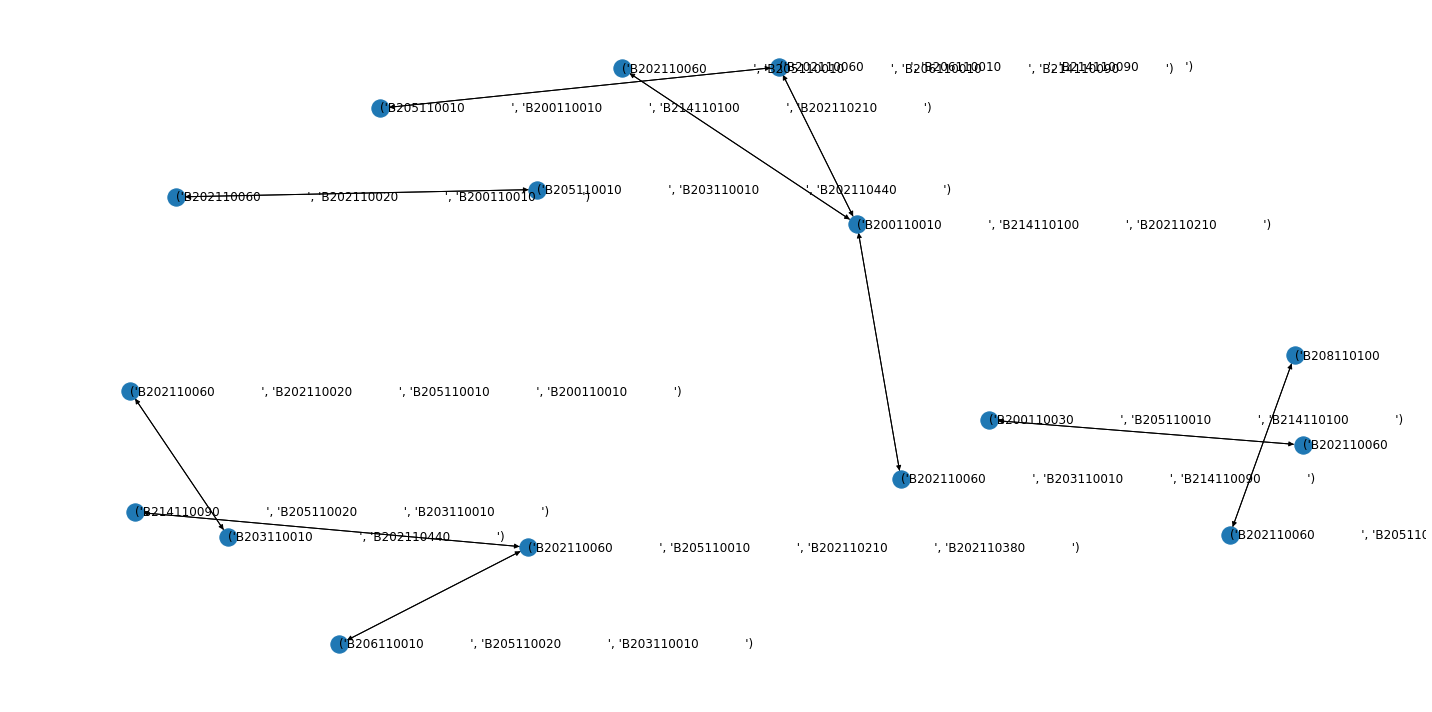

In [59]:
# グラフ描画
pos = nx.spring_layout(G, k=0.9)

plt.figure(figsize=(20, 10))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos,
    horizontalalignment='left', 
    verticalalignment='center')
plt.axis('off')
plt.tight_layout()
plt.show()